In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import pickle

In [3]:
# Load the dataset
df = pd.read_csv(r"C:\Users\user\Downloads\Algerian_forest_fires_cleaned.csv")

In [5]:
# Dataset overview
df.info()  # Information about dataset structure


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [7]:
df.describe()  # Summary statistics for numerical features

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


# Data Cleaning And Preprocessing

In [11]:
# Data cleaning: Check for missing values first
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [13]:
# Remove irrelevant columns
df.drop(columns=['day', 'month', 'year'], inplace=True)

In [15]:
# Encoding the target variable 'Classes' into binary values
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [21]:
# Check for missing values after dropping columns
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [25]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

# Data Visualization and Observations

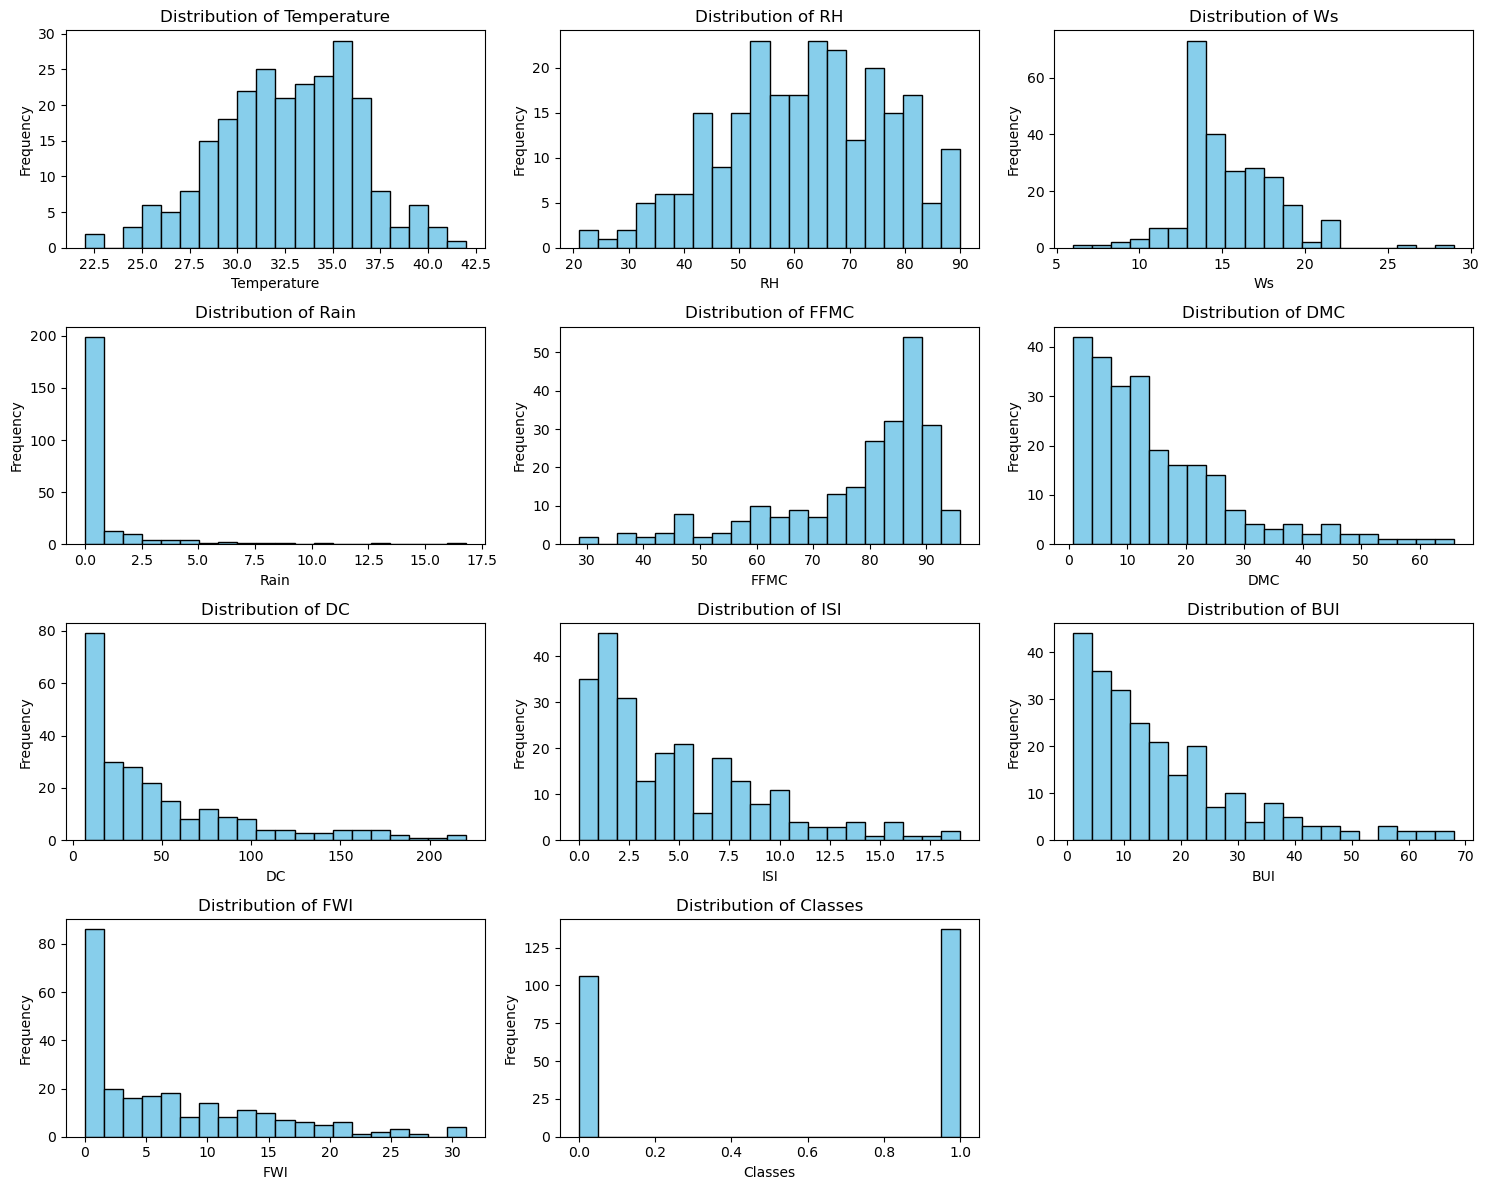

In [30]:
# Histograms for each feature
plt.figure(figsize=(15, 12))
for i, column in enumerate(df.columns[:-1], 1):  # Exclude target variable 'Classes'
    plt.subplot(4, 3, i)  # Adjust subplot grid according to number of features
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

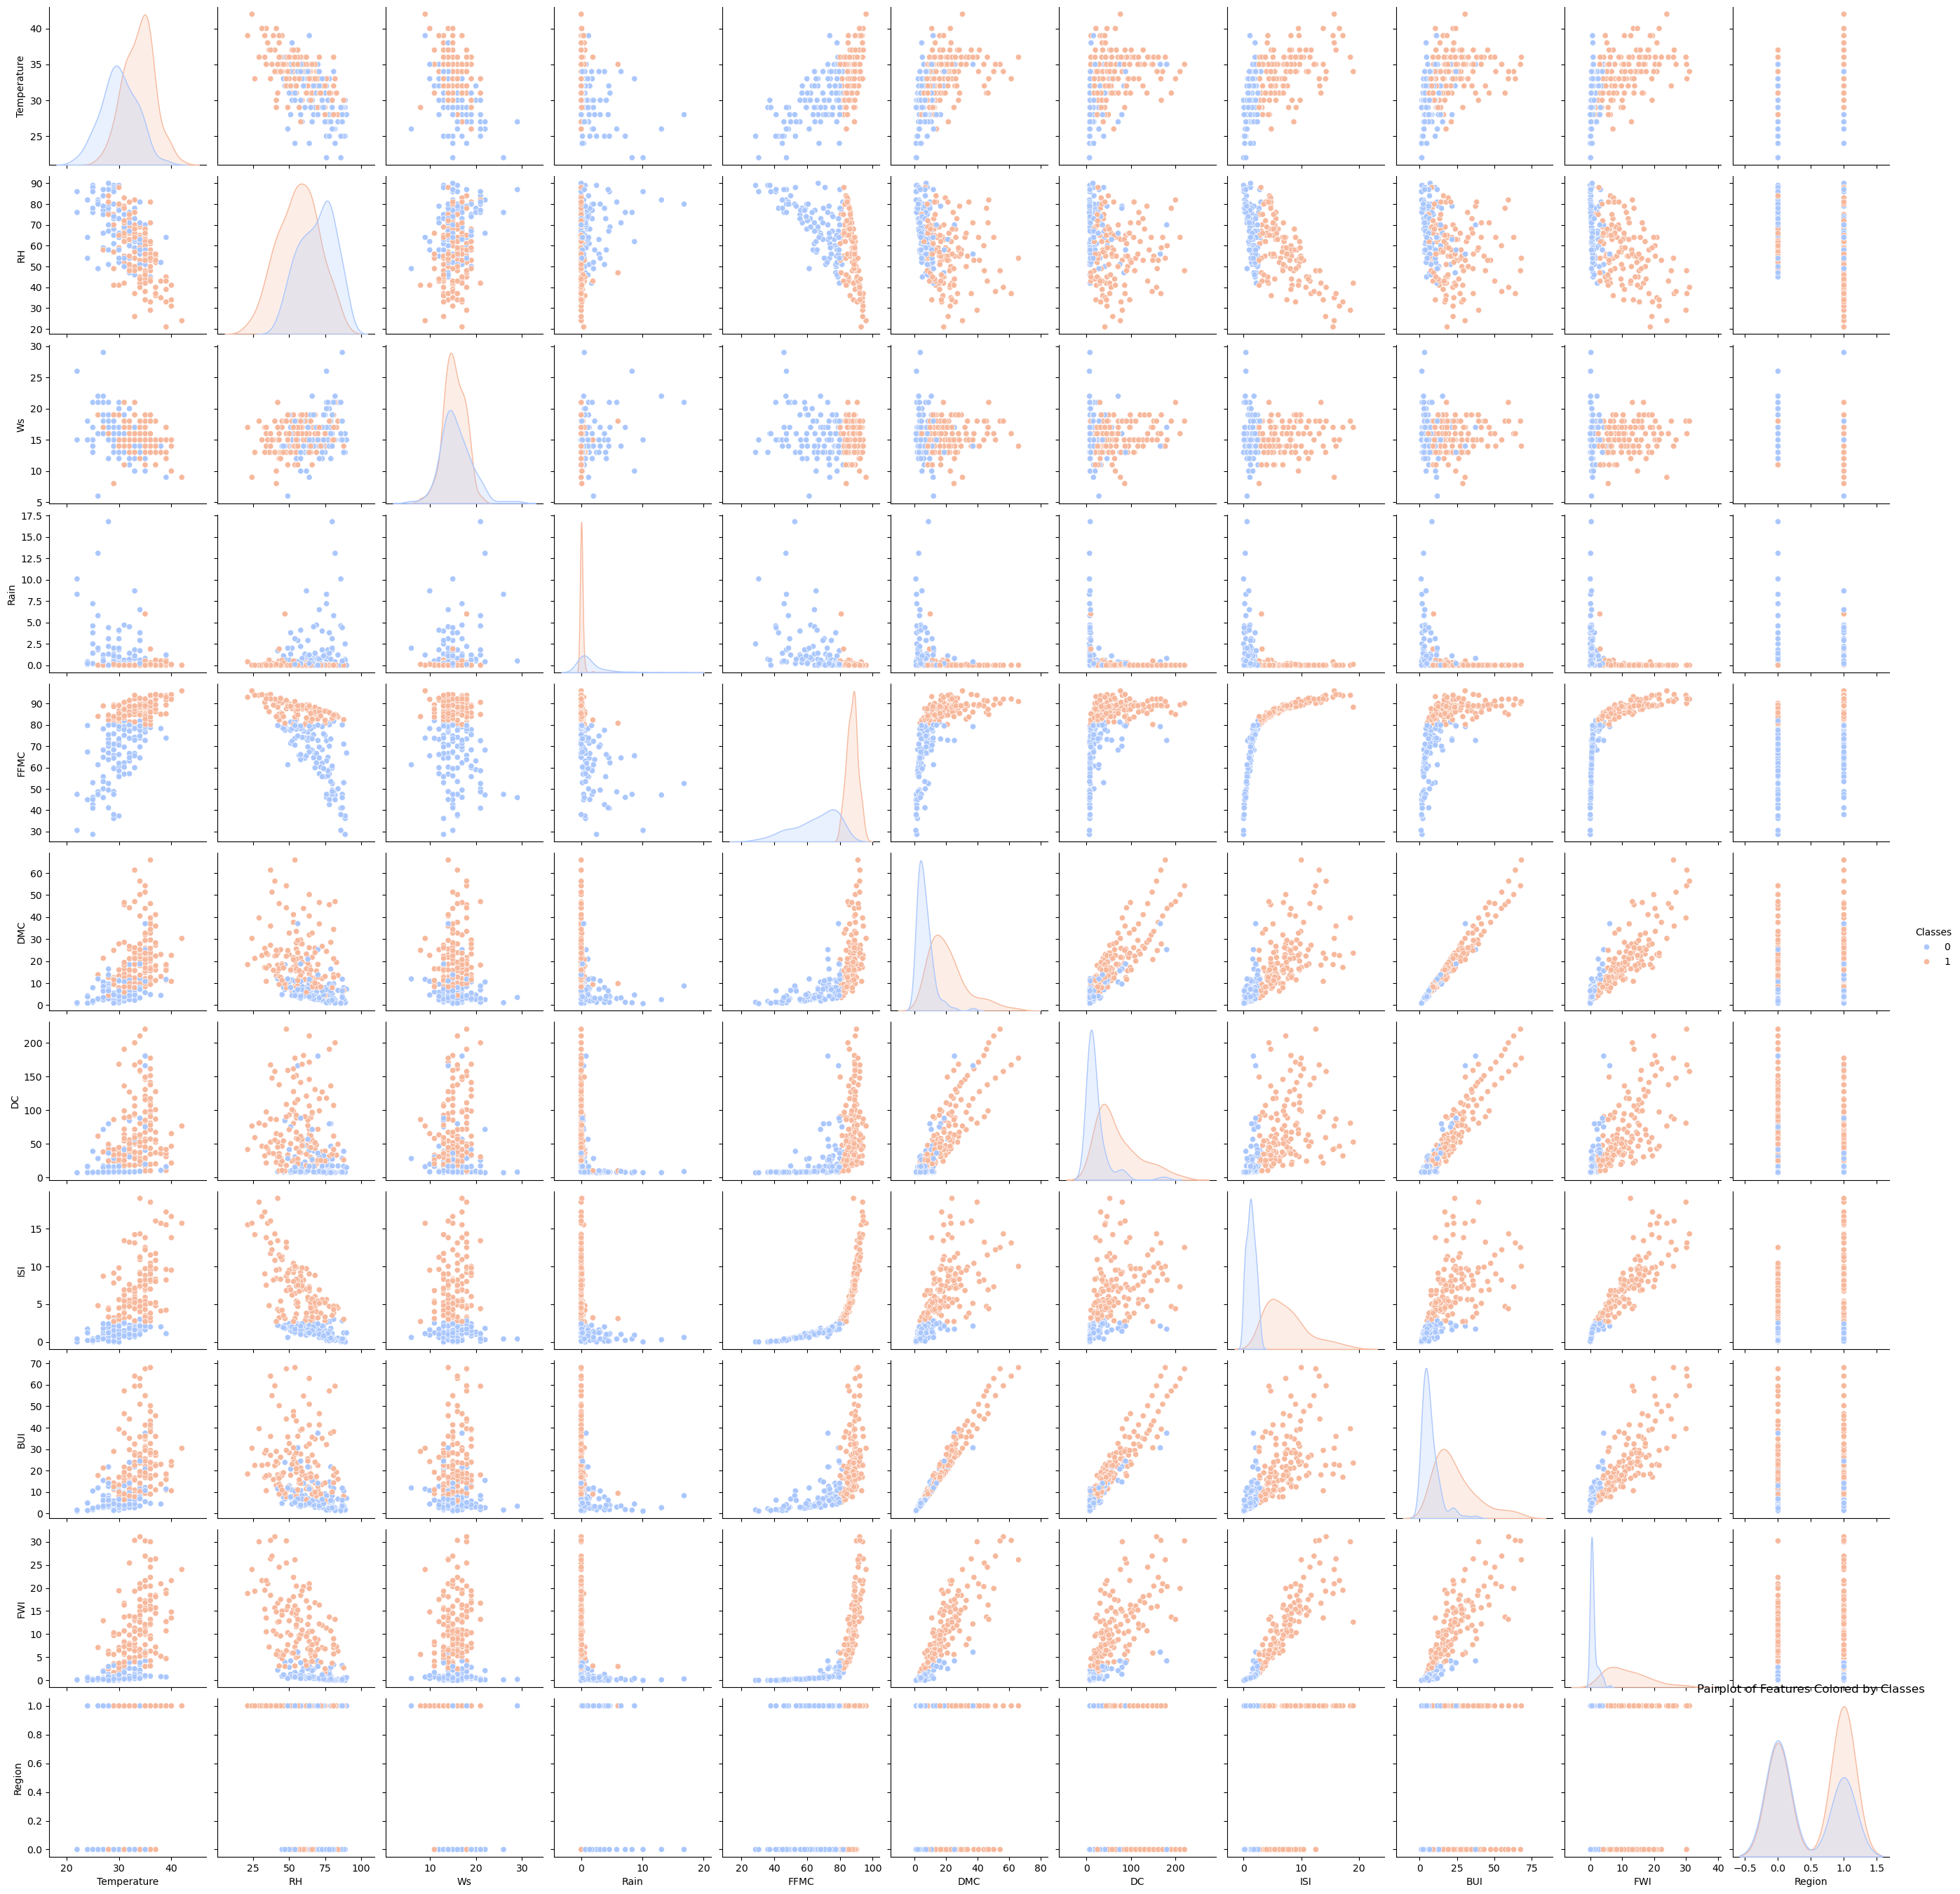

In [32]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='Classes', palette='coolwarm')
plt.title('Pairplot of Features Colored by Classes')
plt.show()

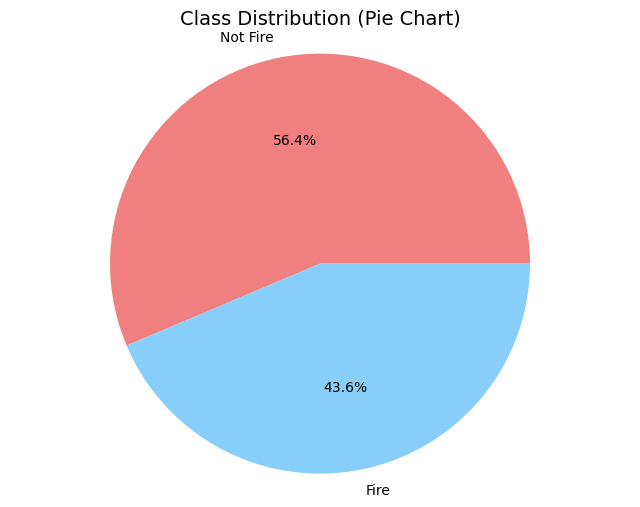

In [41]:
# Pie Chart for Class Distribution
class_counts = df['Classes'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=['Not Fire', 'Fire'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Class Distribution (Pie Chart)', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


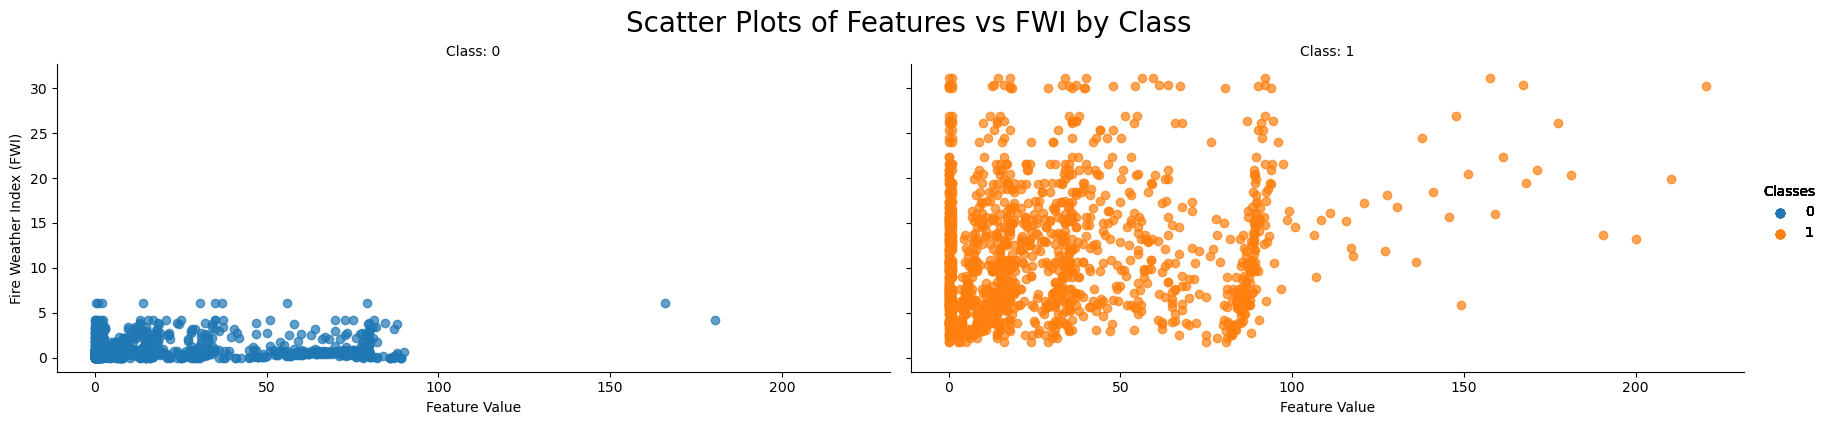

In [43]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the FacetGrid for scatter plots
features = df.columns.drop(['FWI', 'Classes'])  # Independent variables
num_features = len(features)

# Create a grid of scatter plots
g = sns.FacetGrid(df, col='Classes', hue='Classes', palette=['#1f77b4', '#ff7f0e'], height=4, aspect=1.5)

# Map each feature to the scatter plot
for feature in features:
    g.map(plt.scatter, feature, 'FWI', alpha=0.7)  # Scatter plot for each feature vs FWI
    g.add_legend()  # Add legend for classes

# Set titles and labels
g.set_titles(col_template="Class: {col_name}")
g.set_axis_labels("Feature Value", "Fire Weather Index (FWI)")
g.fig.suptitle('Scatter Plots of Features vs FWI by Class', fontsize=20, y=1.05)

plt.show()

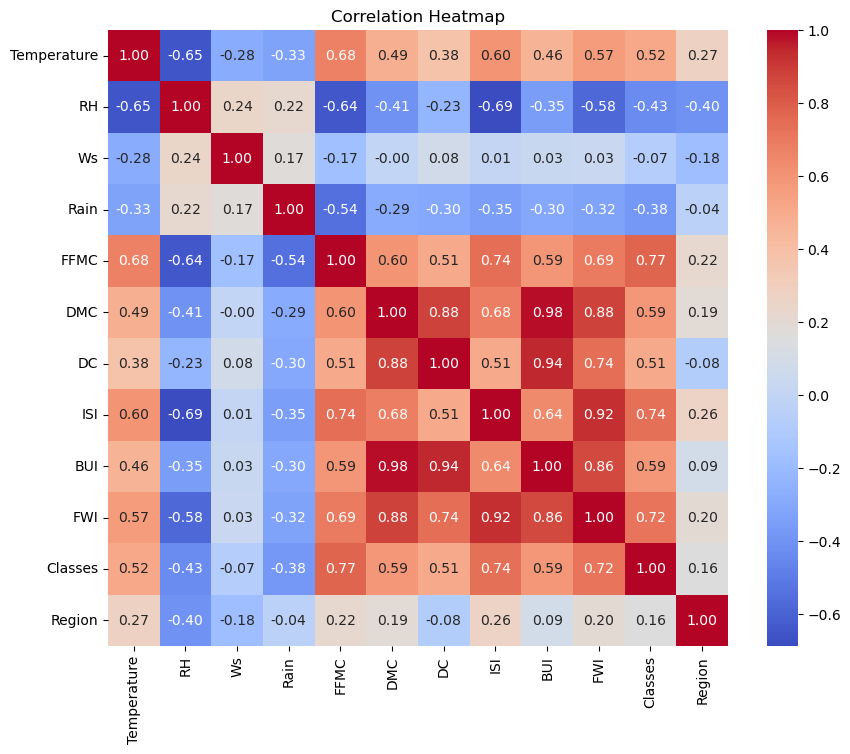

In [45]:
# Plot relation between target and independent variable (Heat Map)

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16640\892888783.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Classes', y='Temperature', palette=['#1f77b4', '#ff7f0e'])


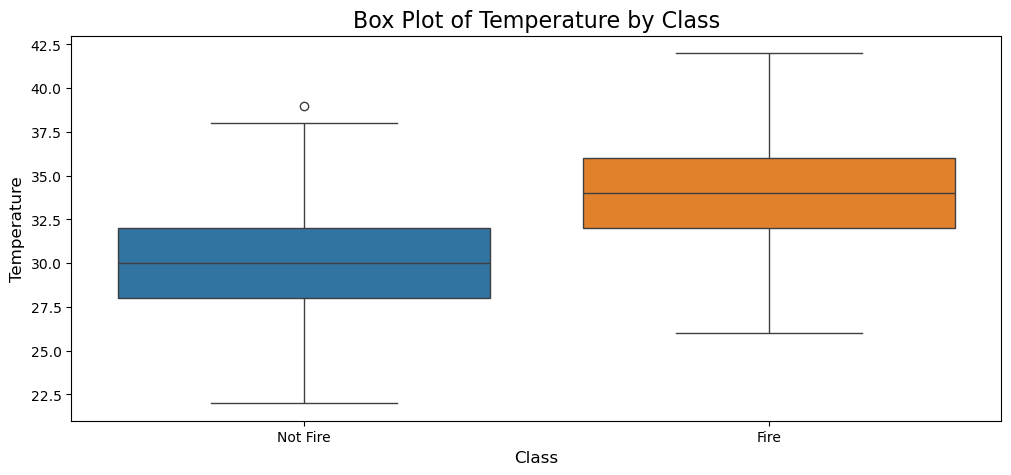

In [47]:
# Box Plot for Distribution of Temperature with Respect to Classes
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Classes', y='Temperature', palette=['#1f77b4', '#ff7f0e'])
plt.title('Box Plot of Temperature by Class', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Temperature', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Not Fire', 'Fire'])  # Set custom labels for classes
plt.show()

# Model Development and Analysis

In [50]:
# Independent & Dependent features
X = df.drop('FWI', axis=1)
y = df['FWI']
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [52]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(182, 11)
(61, 11)
(182,)
(61,)


# Feature selection (Multi collinearity)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each feature
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

initial_vif = calculate_vif(X)
print("Initial VIF:\n", initial_vif)

Initial VIF:
         Feature         VIF
0   Temperature  109.429048
1            RH   32.236045
2            Ws   37.130416
3          Rain    1.655248
4          FFMC  114.994902
5           DMC  205.539005
6            DC   51.257576
7           ISI   11.137955
8           BUI  393.610061
9       Classes    7.064774
10       Region    3.149722


In [61]:
# Drop the feature with the highest VIF
if not initial_vif.empty:
    max_vif_feature = initial_vif.loc[initial_vif['VIF'].idxmax(), 'Feature']
    X = X.drop(max_vif_feature, axis=1)

updated_vif = calculate_vif(X)
print("Updated VIF after dropping the feature with highest VIF:\n", updated_vif)

Updated VIF after dropping the feature with highest VIF:
        Feature         VIF
0  Temperature  109.166458
1           RH   32.212117
2           Ws   37.119996
3         Rain    1.651458
4         FFMC  114.820856
5          DMC   19.565136
6           DC   13.551424
7          ISI   11.131733
8      Classes    6.944951
9       Region    3.038594


In [63]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.85)
print(corr_features)

# Drop features with correlation > 0.85
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
print(X_train.shape)
print(X_test.shape)

{'DC', 'BUI'}
(182, 9)
(61, 9)


In [65]:
from sklearn.preprocessing import StandardScaler

# Initialize Standard Scaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Evaluation and Testing

# Linear Regression

Mean Absolute Error 0.5468236465249976
R-squared score 0.9847657384266951


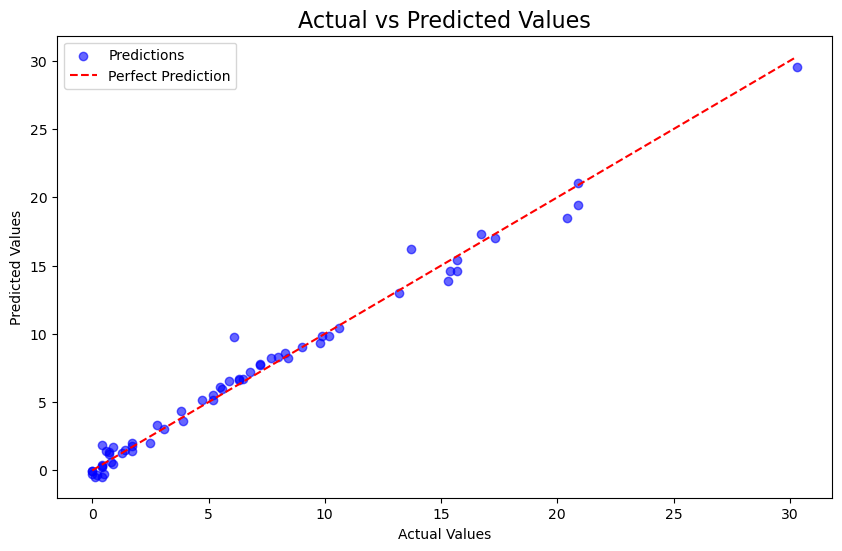

In [75]:
# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"Mean Absolute Error {mae}")
print(f"R-squared score {score}")

# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values', fontsize=16)
plt.legend()
plt.show()


# Lasso Regression

Mean Absolute Error 1.1331759949144085
R-squared score 0.9492020263112388


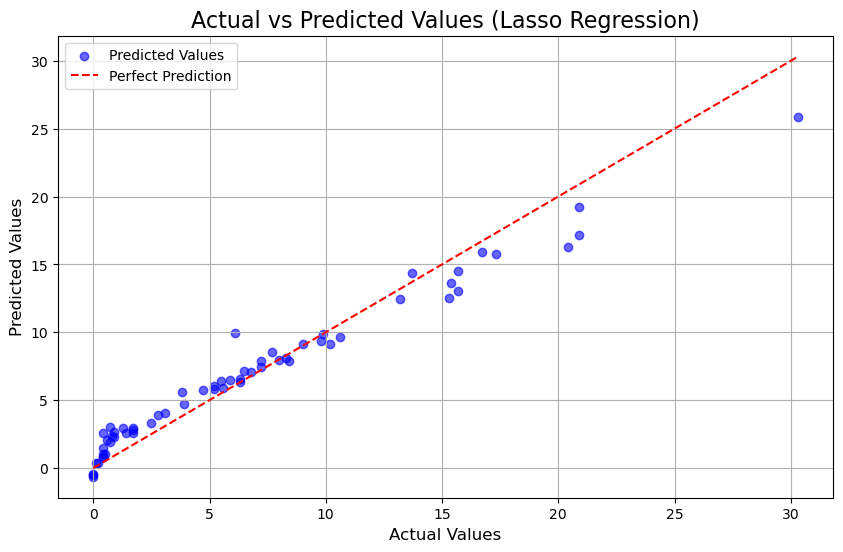

In [78]:
from sklearn.linear_model import Lasso

# Lasso Regression
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)

lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_score = r2_score(y_test, y_pred)
print(f"Mean Absolute Error {lasso_mae}")
print(f"R-squared score {lasso_score}")

# Scatter Plot with Regression Line for Lasso Regression
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted Values')

# Line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Actual vs Predicted Values (Lasso Regression)', fontsize=16)
plt.legend()
plt.grid()

# Show the plot
plt.show()

# HyperParameter Tuning with Cross Validation 

In [81]:
from sklearn.linear_model import LassoCV

# Initialize LassoCV with 5-fold cross-validation
lasso_cv_model = LassoCV(cv=5, random_state=42)  # Added random_state for reproducibility

# Fit the model on the training data
lasso_cv_model.fit(X_train_scaled, y_train)

# Retrieve the best alpha value from cross-validation
best_alpha = lasso_cv_model.alpha_
print(f"Optimal alpha determined by LassoCV: {best_alpha:.4f}")

# Make predictions on the test set
y_pred_cv = lasso_cv_model.predict(X_test_scaled)

# Evaluate the model's performance
mae_cv = mean_absolute_error(y_test, y_pred_cv)
r2_cv_score = r2_score(y_test, y_pred_cv)

# Print performance metrics
print(f"Mean Absolute Error: {mae_cv:.4f}")
print(f"R-squared score: {r2_cv_score:.4f}")

Optimal alpha determined by LassoCV: 0.0573
Mean Absolute Error: 0.6200
R-squared score: 0.9821


# Ridge Regression

Mean Absolute Error 0.5642305340105693
R-squared score 0.9842993364555513


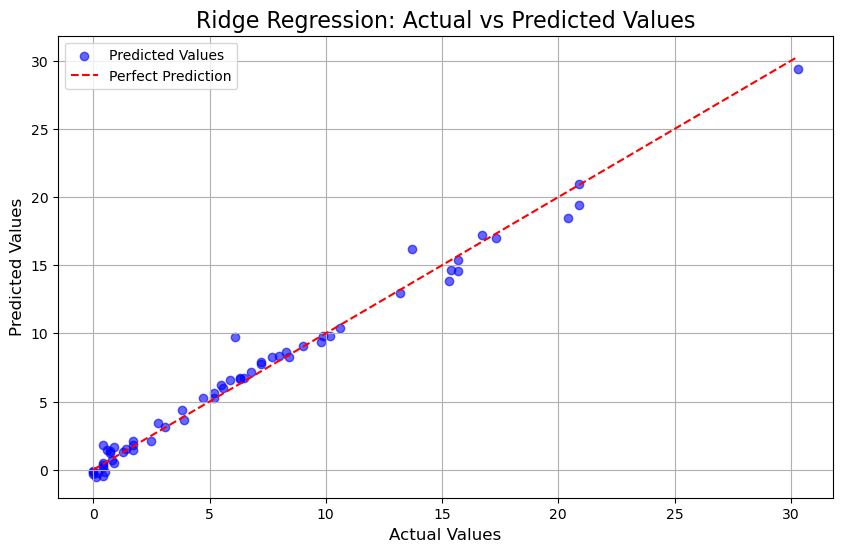

In [84]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

ridge_mae = mean_absolute_error(y_test, y_pred)
ridge_score = r2_score(y_test, y_pred)
print(f"Mean Absolute Error {ridge_mae}")
print(f"R-squared score {ridge_score}")

import matplotlib.pyplot as plt

# Scatter Plot with Regression Line for Ridge Regression
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted Values')

# Line representing perfect predictions (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Adding labels, title, and legend
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Ridge Regression: Actual vs Predicted Values', fontsize=16)
plt.legend()
plt.grid()

# Show the plot
plt.show()

# Elastic Net Regression

Best parameters using GridSearchCV: {'alpha': 0.01, 'l1_ratio': 0.1}
Mean Absolute Error 0.5782161632865677
R-squared score 0.983920100527251


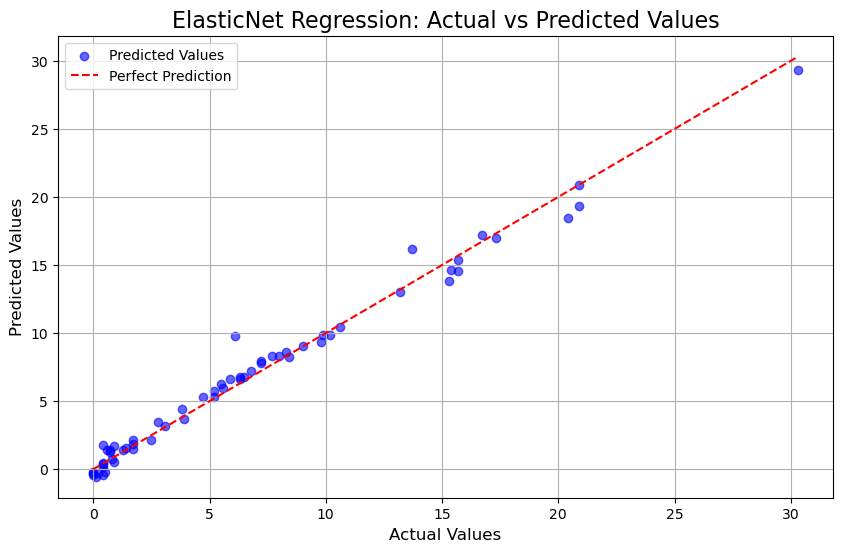

In [89]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for ElasticNet
param_grid = {'alpha': [0.01, 0.1, 1, 10],
              'l1_ratio': [0.1, 0.5, 0.9]}

# Initialize ElasticNet
elasticnet = ElasticNet()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(elasticnet, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_elasticnet = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_elasticnet.predict(X_test_scaled)
elasticnet_mae = mean_absolute_error(y_test, y_pred)
elasticnet_score = r2_score(y_test, y_pred)

print(f"Best parameters using GridSearchCV: {best_params}")
print(f"Mean Absolute Error {elasticnet_mae}")
print(f"R-squared score {elasticnet_score}")

# Scatter Plot with Regression Line for ElasticNet Regression
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted Values')

# Line representing perfect predictions (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Adding labels, title, and legend
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('ElasticNet Regression: Actual vs Predicted Values', fontsize=16)
plt.legend()
plt.grid()

# Show the plot
plt.show()

# Saving the Model

In [106]:
import pickle

# Save the scaler
scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

# Save the Linear Regression model
linreg_filename = 'linreg_model.pkl'
with open(linreg_filename, 'wb') as file:
    pickle.dump(linreg, file)

# Save the Lasso Regression model
lasso_filename = 'lasso_model.pkl'
with open(lasso_filename, 'wb') as file:
    pickle.dump(lasso, file)

# Save the Ridge Regression model
ridge_filename = 'ridge_model.pkl'
with open(ridge_filename, 'wb') as file:
    pickle.dump(ridge, file)

# Save the ElasticNet model
elasticnet_filename = 'elasticnet_model.pkl'
with open(elasticnet_filename, 'wb') as file:
    pickle.dump(best_elasticnet, file)

# Testing the Model

In [109]:
# Load the scaler and models
with open(scaler_filename, 'rb') as file:
    loaded_scaler = pickle.load(file)

with open(linreg_filename, 'rb') as file:
    loaded_linreg = pickle.load(file)

with open(lasso_filename, 'rb') as file:
    loaded_lasso = pickle.load(file)

with open(ridge_filename, 'rb') as file:
    loaded_ridge = pickle.load(file)

with open(elasticnet_filename, 'rb') as file:
    loaded_elasticnet = pickle.load(file)

with open(elasticnet_filename, 'rb') as file:
    loaded_elasticnet = pickle.load(file)

# Define new unseen data
new_data = pd.DataFrame({
    'Temperature': [20],
    'RH': [45],
    'Ws': [20],
    'Rain': [0.9],
    'FFMC': [85],
    'DMC': [6],
    'ISI': [8],
    'Classes': [0],
    'Region': [0]
})

# Scale the new data
new_data_scaled = loaded_scaler.transform(new_data)

# Predict with all models
linreg_pred = loaded_linreg.predict(new_data_scaled)
lasso_pred = loaded_lasso.predict(new_data_scaled)
ridge_pred = loaded_ridge.predict(new_data_scaled)
elasticnet_pred = loaded_elasticnet.predict(new_data_scaled)

print(f"Linear Regression Prediction for FWI: {linreg_pred[0]}")
print(f"Lasso Regression Prediction for FWI: {lasso_pred[0]}")
print(f"Ridge Regression Prediction for FWI: {ridge_pred[0]}")
print(f"ElasticNet Prediction for FWI: {elasticnet_pred[0]}")

Linear Regression Prediction for FWI: 8.007822475968245
Lasso Regression Prediction for FWI: 8.036299238324396
Ridge Regression Prediction for FWI: 7.962006734788019
ElasticNet Prediction for FWI: 7.930846020976215
